import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

read in gdp csv file, skip last 2 rows

In [2]:
gdp_df = pd.read_csv("C:/Users/vredd/Documents/data_science_projects/un_exploration-vredd418/data/gdp_per_capita.csv", skipfooter=2, engine='python')

print first 10 rows

In [3]:
print(gdp_df[0:10])

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2019  2065.036398              NaN
1     Afghanistan  2018  2033.779002              NaN
2     Afghanistan  2017  2058.383832              NaN
3     Afghanistan  2016  2057.062164              NaN
4     Afghanistan  2015  2068.265904              NaN
5     Afghanistan  2014  2102.385234              NaN
6     Afghanistan  2013  2116.465454              NaN
7     Afghanistan  2012  2075.491747              NaN
8     Afghanistan  2011  1904.559799              NaN
9     Afghanistan  2010  1957.029338              NaN


print last 5 rows, last 2 rows are not needed

In [4]:
print(gdp_df[-6:])

     Country or Area  Year        Value  Value Footnotes
6862        Zimbabwe  1995  3226.413930              NaN
6863        Zimbabwe  1994  3263.934978              NaN
6864        Zimbabwe  1993  3033.504852              NaN
6865        Zimbabwe  1992  3054.889178              NaN
6866        Zimbabwe  1991  3426.598094              NaN
6867        Zimbabwe  1990  3324.348171              NaN


drop Value Footnotes column, rename other columns

In [5]:
gdp_df.drop(columns='Value Footnotes', inplace=True)

In [6]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [7]:
gdp_df.shape

(6868, 3)

In [8]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [9]:
gdp_df['Country'] = gdp_df['Country'].astype(str)

In [10]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [11]:
print(gdp_df['Year'].unique())

[2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006
 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992
 1991 1990]


In [12]:
print(gdp_df['Year'].value_counts())

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64


How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [13]:
print(gdp_df['Country'].nunique())

238


In [14]:
print(gdp_df['Country'].value_counts())

France                       30
Chad                         30
Macao SAR, China             30
Benin                        30
East Asia & Pacific          30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64


Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [15]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]

Use .describe() to find the summary statistics for GDP per capita in 2014.

In [16]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

(array([[238.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [238.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [139.,  48.,  24.,  19.,   4.,   1.,   2.,   0.,   0.,   1.]]),
 array([0.0, 15651.413384978401, 31302.826769956802, 46954.24015493521,
        62605.653539913605, 78257.066924892, 93908.48030987041,
        109559.89369484881, 125211.30707982721, 140862.7204648056,
        156514.133849784], dtype=object),
 <a list of 3 BarContainer objects>)

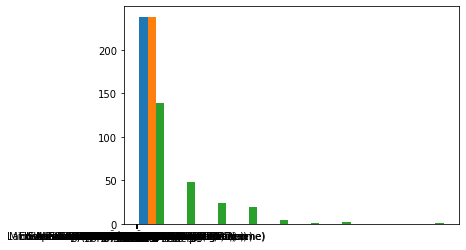

In [17]:
plt.hist(gdp_2014, bins=10)

Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [18]:
gdp_2014.sort_values(by=['GDP_Per_Capita'], ascending=False).head(5)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [19]:
gdp_2014.sort_values(by=['GDP_Per_Capita'], ascending=True).head(5)

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [20]:
gdp_df_90_17 = gdp_df[gdp_df['Year'].isin([1990,2017])]
gdp_pivoted = gdp_df_90_17.pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')
gdp_pivoted = gdp_pivoted.dropna(axis=0)

In [21]:
print(gdp_pivoted.head())

Year                         1990          2017
Country                                        
Albania               4842.734635  12811.759436
Algeria               8746.352901  11737.409353
Angola                5783.429064   7310.901738
Antigua and Barbuda  15459.551675  19840.076123
Arab World            9694.667544  14555.474921


Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [22]:
gdp_pivoted['Percent_Change'] = 100 * ((gdp_pivoted[2017]-gdp_pivoted[1990]) / gdp_pivoted[1990])

How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [23]:
(gdp_pivoted['Percent_Change']<0).value_counts()

False    190
True      17
Name: Percent_Change, dtype: int64

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [24]:
print(gdp_pivoted.sort_values('Percent_Change', ascending=False).head(n=2))                                                               

Year                      1990          2017  Percent_Change
Country                                                     
Equatorial Guinea  1039.985049  22551.083246     2068.404561
China              1423.896348  14344.421239      907.406281


Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [25]:
continents = pd.read_csv("C:/Users/vredd/Documents/data_science_projects/un_exploration-vredd418/data/continents.csv")

Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [26]:
gdp_df = gdp_df.merge(continents, on='Country')

Determine the number of countries per continent. Create a bar chart showing this.

In [27]:
gdp_country_cont = pd.DataFrame(gdp_df.groupby(['Continent'])['Country'].nunique())

In [28]:
print(gdp_country_cont)

               Country
Continent             
Africa              49
Asia                43
Europe              45
North America       26
Oceania             14
South America       11


<BarContainer object of 6 artists>

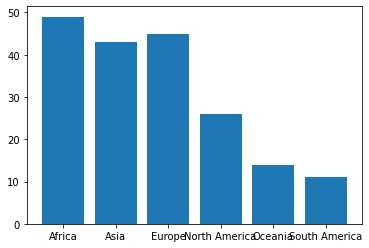

In [29]:
plt.bar(gdp_country_cont.index, gdp_country_cont['Country'])

Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [30]:
gdp_2014 = gdp_df[gdp_df['Year']==2014].groupby(gdp_df['Continent'])

In [31]:
sns.boxplot(x=gdp_2014.index, y=gdp_2014['GDP_Per_Capita'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [ ]:
gdp_2014.columns

In [ ]:
print(gdp_2014.head())

Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [55]:
internet_df = pd.read_csv("C:/Users/vredd/Documents/data_science_projects/un_exploration-vredd418/data/internet_use.csv", nrows=4495)
print(internet_df)

     Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...              ...   ...       ...              ...
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN

[4495 rows x 4 columns]


Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [56]:
internet_df = internet_df.drop(columns='Value Footnotes').rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [57]:
internet_df.shape

(4495, 3)

In [58]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [67]:
print(internet_df[internet_df['Internet_Users_Pct']>0].sort_values('Year')[:1])

     Country  Year  Internet_Users_Pct
2048   Italy  1990            0.017545


Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.
Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.



Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. How many countries have at least 90% internet users in 2014?

Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?